Train shape: (891, 12)
Test shape: (418, 11)

Train head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

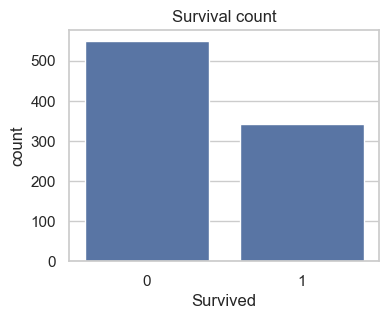

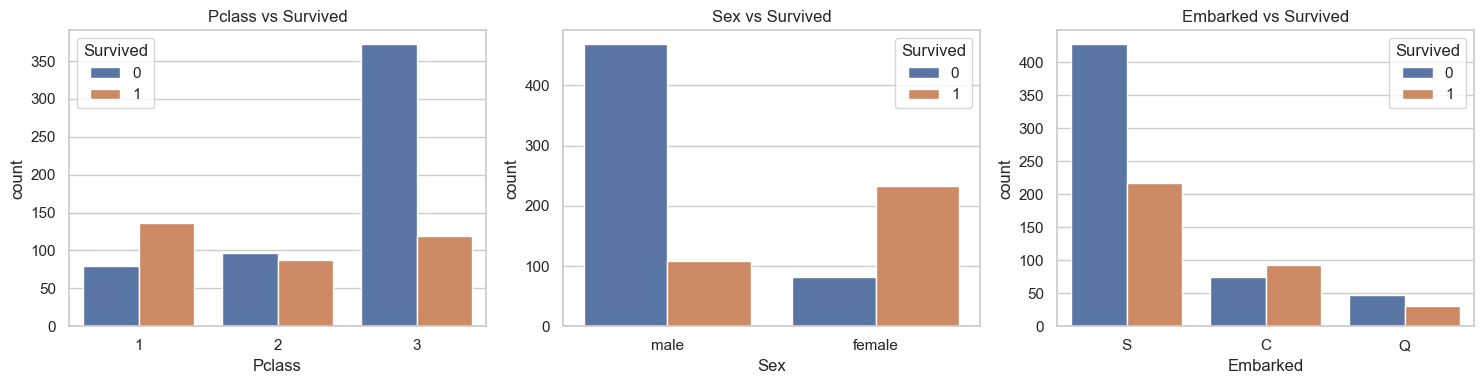

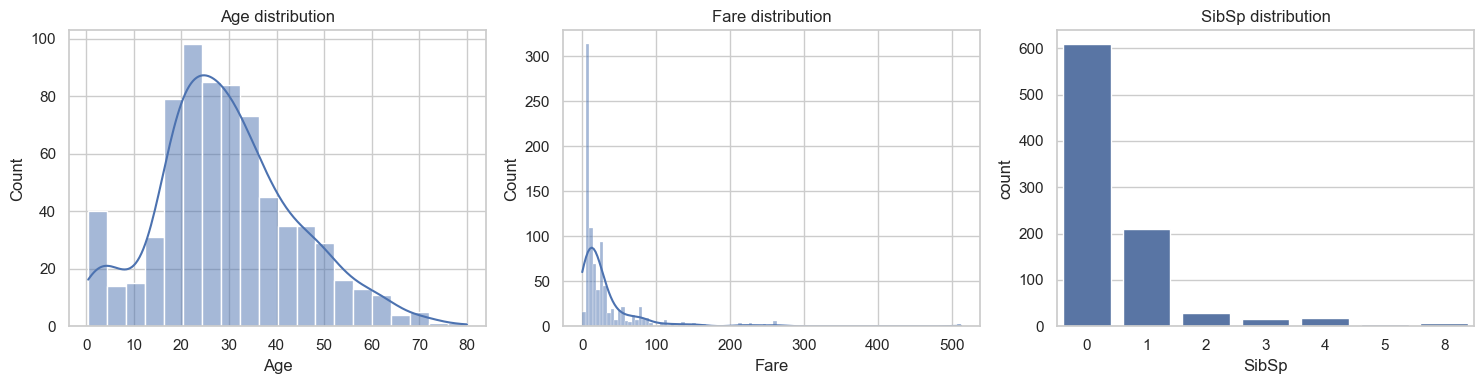

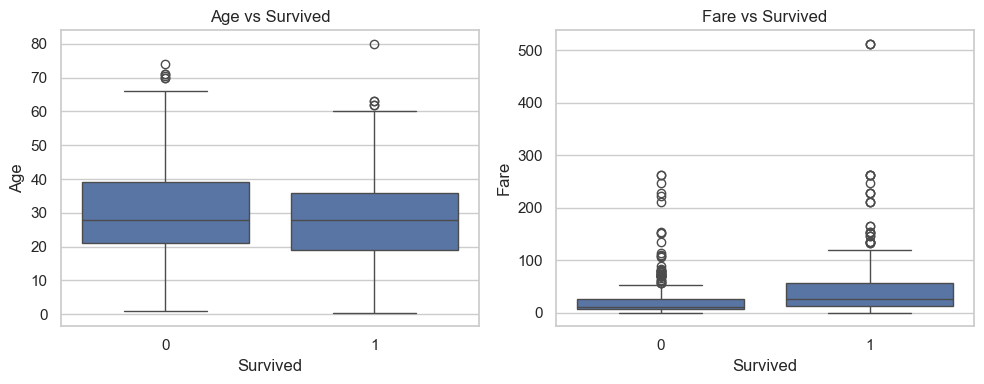

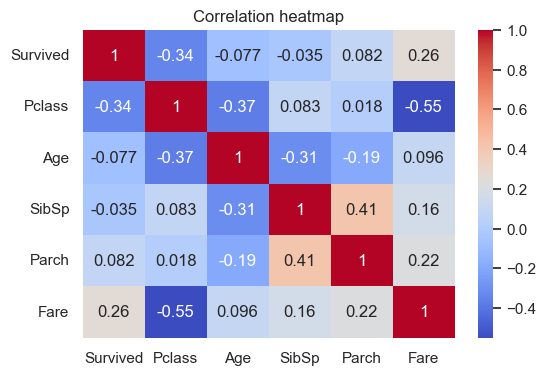

C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_5688\2334874040.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full["Age"].fillna(full["Age"].median(), inplace=True)
C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_5688\2334874040.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh


X_train shape: (712, 8)
X_valid shape: (179, 8)

=== Evaluation on validation set ===
Accuracy: 0.8044692737430168
Precision: 0.7931034482758621
Recall: 0.6666666666666666
F1-score: 0.7244094488188977
ROC-AUC: 0.8442687747035573

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



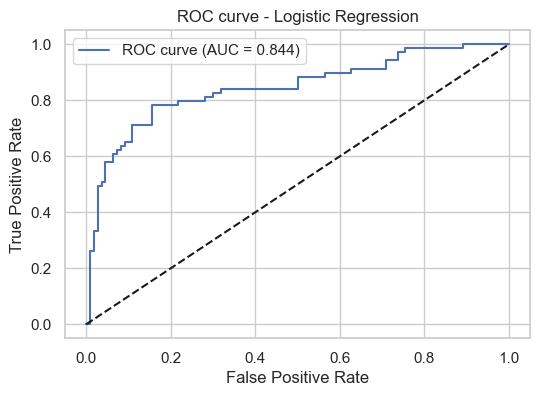


=== Coefficients and odds ratios ===
      feature  coefficient  odds_ratio
1         Sex     2.559204   12.925527
6  Embarked_Q     0.279191    1.322059
5        Fare     0.002247    1.002250
2         Age    -0.038535    0.962198
4       Parch    -0.071432    0.931060
3       SibSp    -0.243759    0.783676
7  Embarked_S    -0.381479    0.682850
0      Pclass    -1.091160    0.335827

Saved predictions to titanic_logreg_predictions.csv
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

Saved logreg_titanic.pkl and titanic_features.pkl for Streamlit app.


In [1]:
# ===== 1. Imports =====
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report)

import joblib

# ===== 2. Load data =====
train = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/Logistic Regression/Logistic Regression/Titanic_train.csv")
test = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/Logistic Regression/Logistic Regression/Titanic_test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain head:")
print(train.head())
print("\nInfo:")
print(train.info())
print("\nTrain tail:")
print(train.tail())
print("\nDescribe(include='all'):")
print(train.describe(include="all"))

# ===== 3. Basic EDA plots =====
sns.set(style="whitegrid")

# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x="Survived", data=train)
plt.title("Survival count")
plt.show()

# Categorical vs target
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[0])
axes[0].set_title("Pclass vs Survived")

sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].set_title("Sex vs Survived")

sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[2])
axes[2].set_title("Embarked vs Survived")

plt.tight_layout()
plt.show()

# Numerical distributions
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(train["Age"].dropna(), kde=True, ax=axes[0])
axes[0].set_title("Age distribution")

sns.histplot(train["Fare"], kde=True, ax=axes[1])
axes[1].set_title("Fare distribution")

sns.countplot(x="SibSp", data=train, ax=axes[2])
axes[2].set_title("SibSp distribution")

plt.tight_layout()
plt.show()

# Boxplots vs Survived
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(x="Survived", y="Age", data=train, ax=axes[0])
axes[0].set_title("Age vs Survived")

sns.boxplot(x="Survived", y="Fare", data=train, ax=axes[1])
axes[1].set_title("Fare vs Survived")

plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_cols = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
corr = train[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

# ===== 4. Preprocessing =====
full = train.copy()

drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
full = full.drop(columns=drop_cols)
test_proc = test.drop(columns=drop_cols)

# Impute Age
full["Age"].fillna(full["Age"].median(), inplace=True)
test_proc["Age"].fillna(test_proc["Age"].median(), inplace=True)

# Impute Embarked
full["Embarked"].fillna(full["Embarked"].mode()[0], inplace=True)
test_proc["Embarked"].fillna(full["Embarked"].mode()[0], inplace=True)

# Impute Fare
full["Fare"].fillna(full["Fare"].median(), inplace=True)
test_proc["Fare"].fillna(test_proc["Fare"].median(), inplace=True)

# Encode Sex
sex_map = {"male": 0, "female": 1}
full["Sex"] = full["Sex"].map(sex_map)
test_proc["Sex"] = test_proc["Sex"].map(sex_map)

# One-hot encode Embarked
full = pd.get_dummies(full, columns=["Embarked"], drop_first=True)
test_proc = pd.get_dummies(test_proc, columns=["Embarked"], drop_first=True)

# Align columns
test_proc = test_proc.reindex(columns=[c for c in full.columns if c != "Survived"], fill_value=0)

X = full.drop("Survived", axis=1)
y = full["Survived"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nX_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)

# ===== 5. Model training =====
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# ===== 6. Evaluation =====
y_pred = log_reg.predict(X_valid)
y_proba = log_reg.predict_proba(X_valid)[:, 1]

acc = accuracy_score(y_valid, y_pred)
prec = precision_score(y_valid, y_pred)
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_proba)

print("\n=== Evaluation on validation set ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("\nClassification report:\n", classification_report(y_valid, y_pred))

fpr, tpr, thresholds = roc_curve(y_valid, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# ===== 7. Coefficient interpretation table =====
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": log_reg.coef_[0]
})
coef_df["odds_ratio"] = np.exp(coef_df["coefficient"])
coef_df = coef_df.sort_values(by="coefficient", ascending=False)
print("\n=== Coefficients and odds ratios ===")
print(coef_df)

# ===== 8. Train final model on full training data =====
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X, y)

test_pred = final_model.predict(test_proc)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})
submission.to_csv("titanic_logreg_predictions.csv", index=False)
print("\nSaved predictions to titanic_logreg_predictions.csv")
print(submission.head())

# ===== 9. Save model and feature list for Streamlit =====
joblib.dump(final_model, "logreg_titanic.pkl")
joblib.dump(list(X.columns), "titanic_features.pkl")
print("\nSaved logreg_titanic.pkl and titanic_features.pkl for Streamlit app.")


In [2]:
"""
Interview Questions:

Q.1) What is the difference between precision and recall?
Ans: Precision is the ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant. 
Recall is the ratio of true positive predictions to the total actual positives, indicating how many relevant items are selected.

Q.2) What is cross-validation and why is it important in binary classification?
Ans: Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. 
It involves partitioning the data into subsets, training the model on some subsets (training set) and validating it on the remaining subsets (validation set). 
This process is repeated multiple times to ensure that every data point has been used for both training and validation.

"""

'\nInterview Questions:\n\nQ.1) What is the difference between precision and recall?\nAns: Precision is the ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant. \nRecall is the ratio of true positive predictions to the total actual positives, indicating how many relevant items are selected.\n\nQ.2) What is cross-validation and why is it important in binary classification?\nAns: Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. \nIt involves partitioning the data into subsets, training the model on some subsets (training set) and validating it on the remaining subsets (validation set). \nThis process is repeated multiple times to ensure that every data point has been used for both training and validation.\n\n'